In [2]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import igraph as ig
import markov as mkv
from statistics import mean
from tqdm.notebook import tqdm
from math import sqrt, exp
import matplotlib.pylab as pylab
from utils import catalan_number
from utils import poisson_expectation

In [27]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'medium',
          'axes.grid': False}
pylab.rcParams.update(params)

simulation_params = {
    'color':'blue', 'marker':'o', 'markersize':7, 'linestyle':'none', 'markerfacecolor':'none', 'label':'simulation'
}

simulation_params_linearized = {
    'color':'green', 'marker':'x', 'markersize':7, 'linestyle':'none', 'markerfacecolor':'none'
}

theory_params = {
    'color':'red',
    'label': 'mean-field with analytic'
}
theory_params_reg = {
    'color':'green',
    'label': 'mean-field'
}

In [3]:
# file_name = './data/walks_0-4_s200000.h5'
# df = pd.read_hdf(file_name, 'table')
df = pd.concat([pd.read_hdf(f'./data/walks_0-4_s200000.h5', 'table'),pd.read_hdf(f'./data/walks_0-1_s200000.h5', 'table')])
df['c'] = df['c'].round(3)

df_linearized = pd.read_hdf('./data/walks_linearized_0-1_s200000.h5', 'table')
df_linearized['c'] = df_linearized['c'].round(3)
#df2 = pd.read_csv(file_path.replace('walkData', 'timeStats'))
#df3 = pd.read_csv(file_path.replace('walkData', 'distinctSitesStats'))


In [3]:
df = pd.concat([pd.read_hdf(f'./data/walks_0-1_s200000.h5', 'table'),pd.read_hdf(f'./data/walks_0-1_2_s200000.h5', 'table'),pd.read_hdf(f'./data/walks_0-1_3_s200000.h5', 'table')])


In [9]:
df[df['is_retroceding']].drop(['is_retroceding', 'distinct_sites'], axis=1).to_csv('./data/walks_er.csv.zip', index=False, compression='zip')

In [4]:
def prob_retroceding_theory_reg(c):
    return ((1+c)*(1-sqrt((-1+c)**2/(1+c)**2)))/(2*c)

def mean_prob_retro_theory_reg(c):
    if c==1:
        return np.inf

    return 2/((1+c)*sqrt((-1+c)**2/(1+c)**2))

def mean_field_reg(c, t):
    if t % 2 == 1:
        return 0
    else:
        k = int(t / 2)
        return catalan_number(k - 1) * (c / (c + 1)) ** (k - 1) * (1/(c+1))**k



In [5]:
def prob_retroceding_theory(c):
    if c<=1:
        return 1
    else:
        return (exp(-c)*(1-c**2)-1+c+c**2)/c**3
    # return sum([mean_field(c, t) for t in range(2, 1000)])

def mean_prob_retro_theory(c):
    if c==1:
        return np.inf
    else:
        return (2*exp(-c)*(1+c-exp(c)+c**2*exp(c)+(-1-c+exp(c))*abs(c-1)))/(c**2*abs(c-1))
    # return sum([t*mean_field(c, t) for t in range(2, 1000)])

def mean_field(c, t):
    if t % 2 == 1:
        return 0
    if t==2:
        return (1-exp(-c))/c
    else:
        k = int(t / 2)
        A = (1+c)*(exp(-c)-1+c)/c**2
        return A*catalan_number(k - 1) * (c / (c + 1)) ** (k - 1) * (1/(c+1))**k

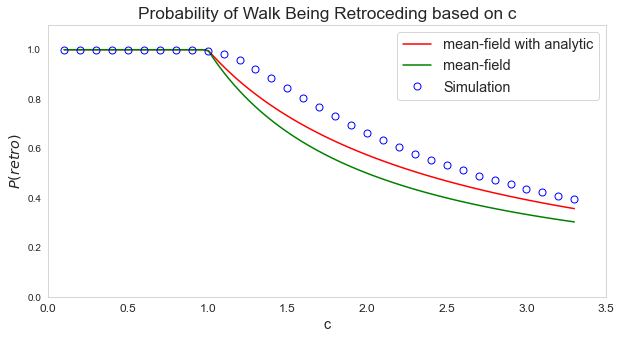

In [25]:
# Calculate the probability of the walk being retroceding based on the value of c
prob_retroceding = df.groupby('c')['is_retroceding'].mean()


theory_x = np.linspace(np.min(df['c'].unique()), np.max(df['c'].unique()), 100)
theory_y = [prob_retroceding_theory(c) for c in theory_x]
theory_y_reg = [prob_retroceding_theory_reg(c) for c in theory_x]


plt.plot(theory_x, theory_y, **theory_params)
plt.plot(theory_x, theory_y_reg, **theory_params_reg)
plt.plot(prob_retroceding.index, prob_retroceding.values, **simulation_params)

plt.xlabel('c')
plt.ylabel('$P(retro)$')
plt.ylim([0,1.1])
plt.xlim([0,3.5])
plt.title('Probability of Walk Being Retroceding based on c')
plt.legend()
plt.show()

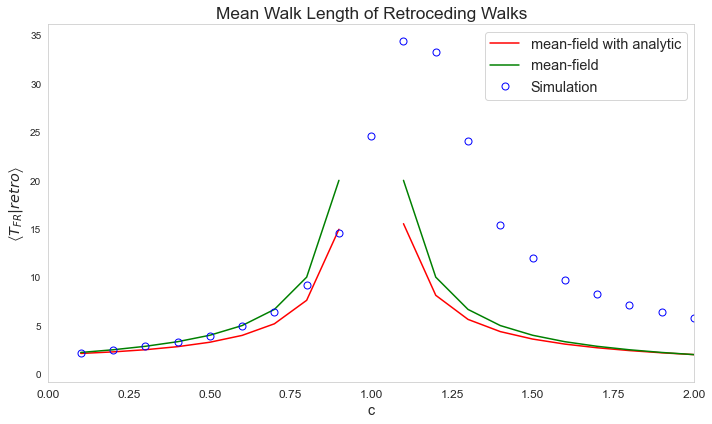

In [24]:
# Calculate the mean for all walks
#mean_all = df[df['c']<1.5].groupby('c')['walk_length'].mean()

mean_retroceding = df[df['is_retroceding']].groupby('c')['walk_length'].mean()


# Create the scatterplot
plt.figure(figsize=(10, 6))

# plt.plot(mean_all.index, mean_all.values, 'bo', label='All Walks')


theory_x = sorted(df['c'].unique())
theory_y = [mean_prob_retro_theory(c) for c in theory_x]
theory_y_reg = [mean_prob_retro_theory_reg(c) for c in theory_x]

plt.plot(theory_x, theory_y, **theory_params)
plt.plot(theory_x, theory_y_reg, **theory_params_reg)
plt.plot(mean_retroceding.index, mean_retroceding.values, **simulation_params)
# Set plot labels and title
plt.xlabel('c')
plt.ylabel(r'$\left\langle T_{FR}|retro\right\rangle$')
plt.title('Mean Walk Length of Retroceding Walks')
plt.xlim([0,2])
plt.legend()


plt.tight_layout()
plt.show()

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


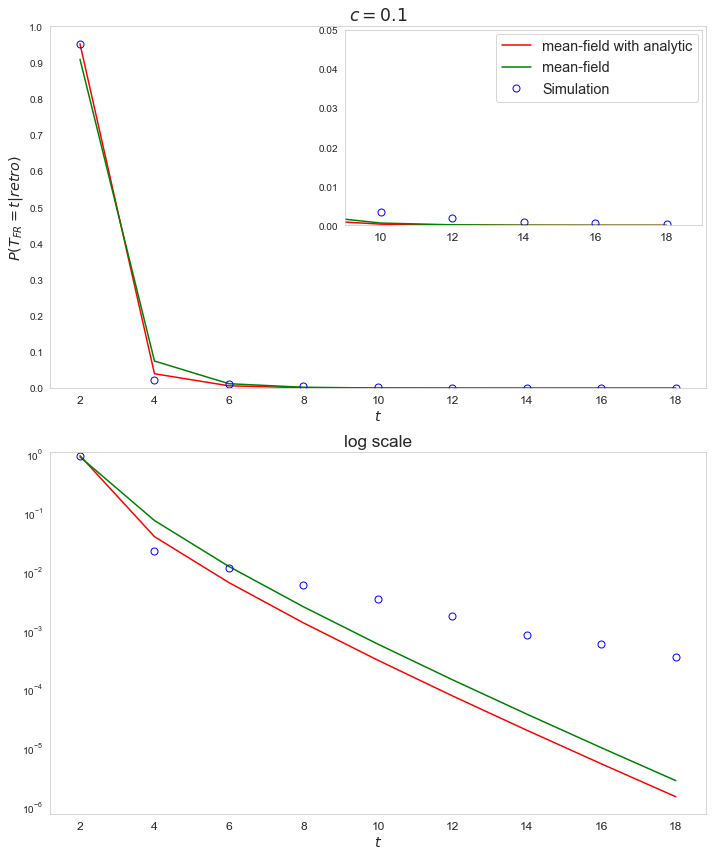

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


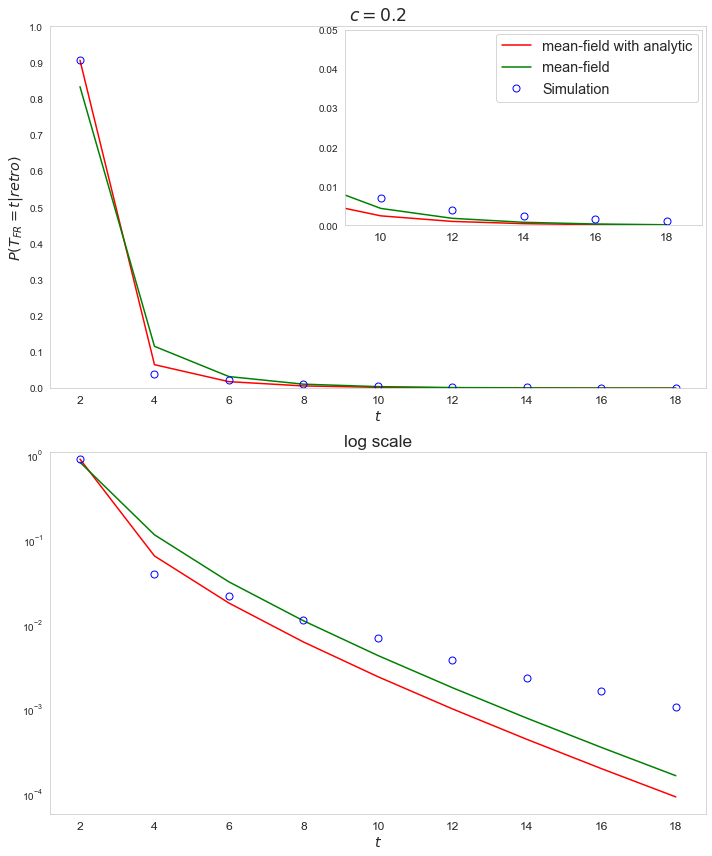

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


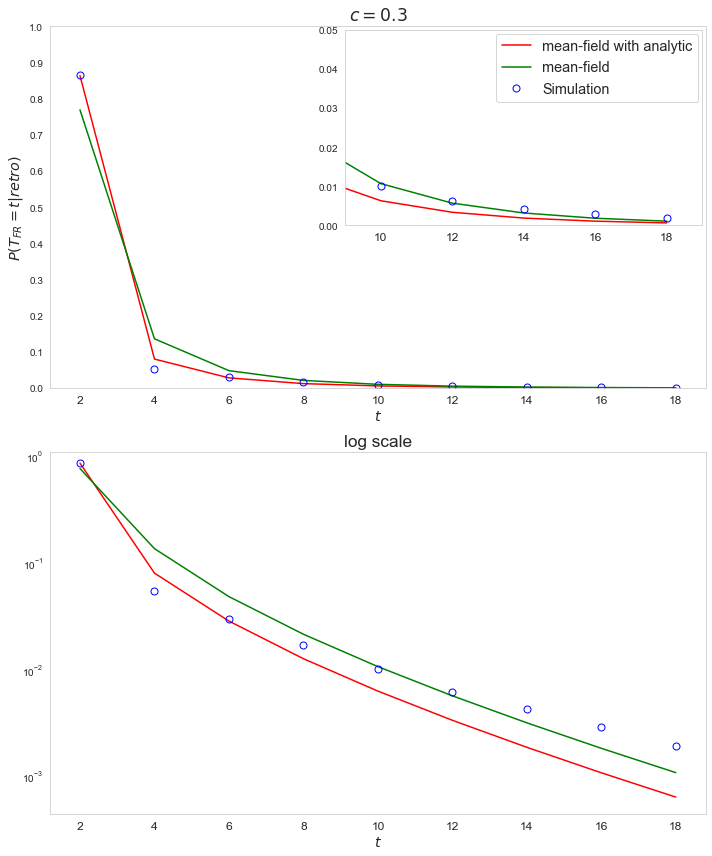

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


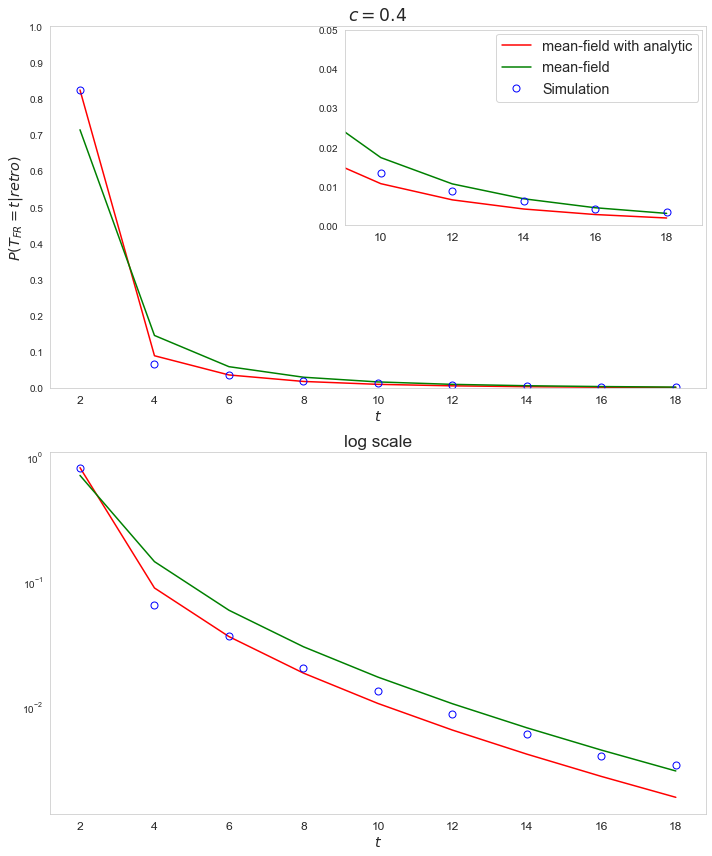

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


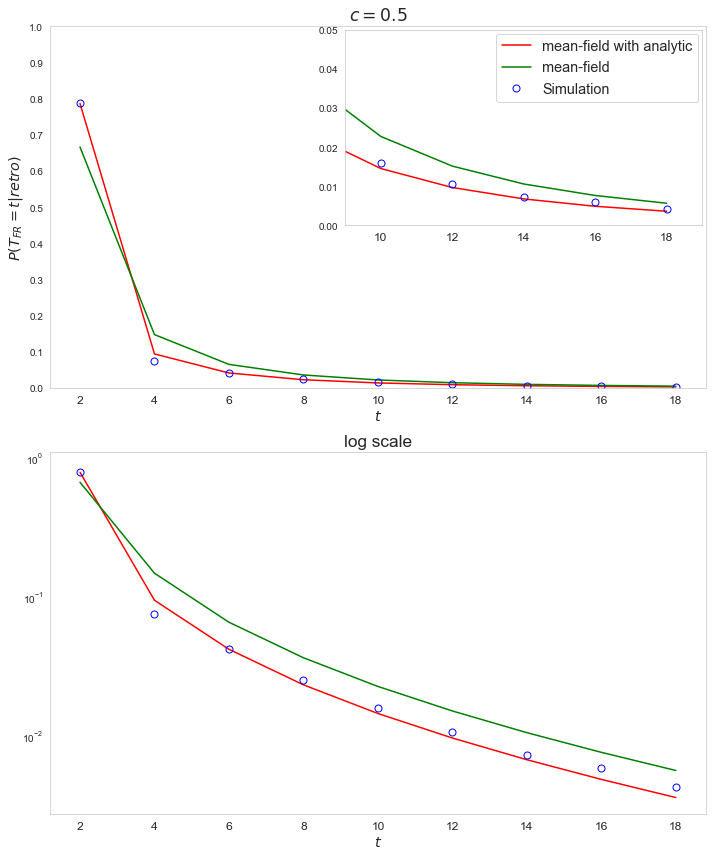

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


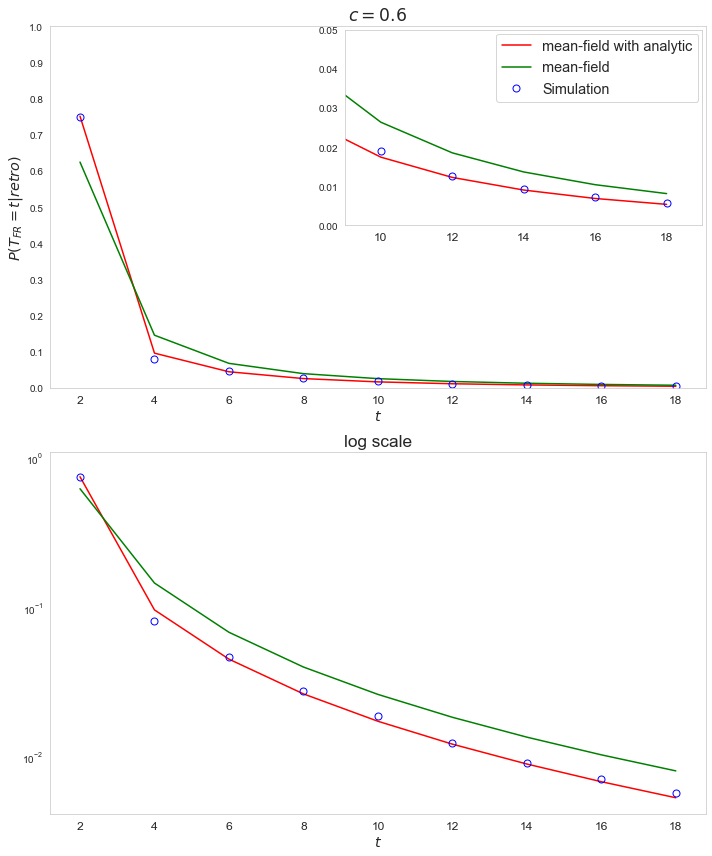

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


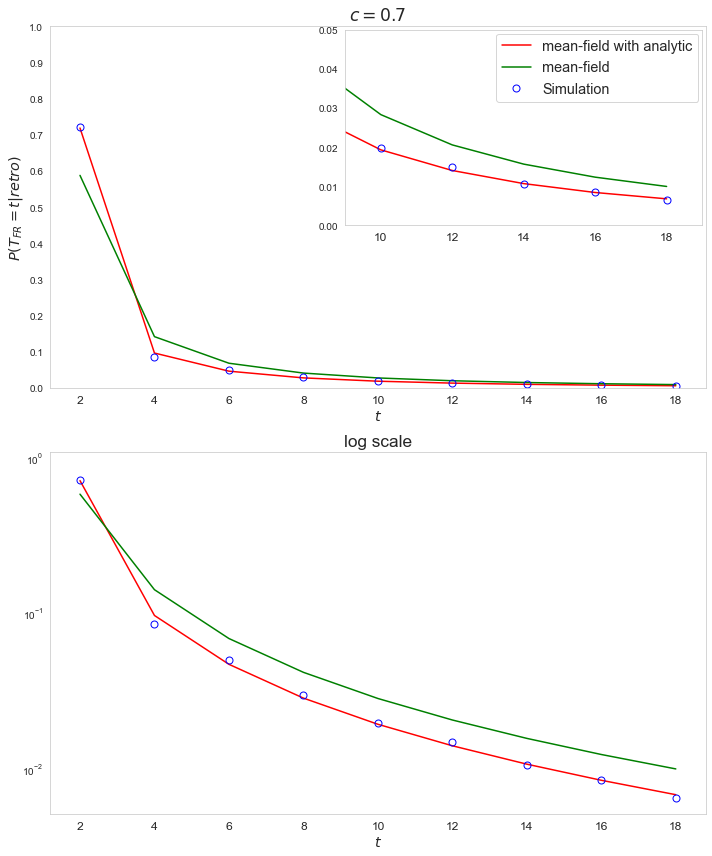

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


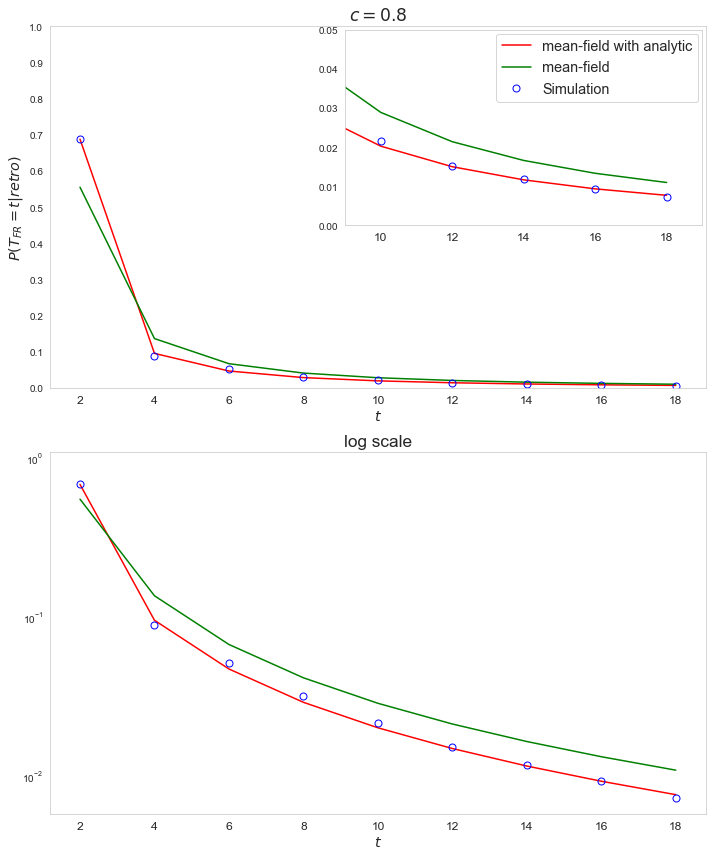

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


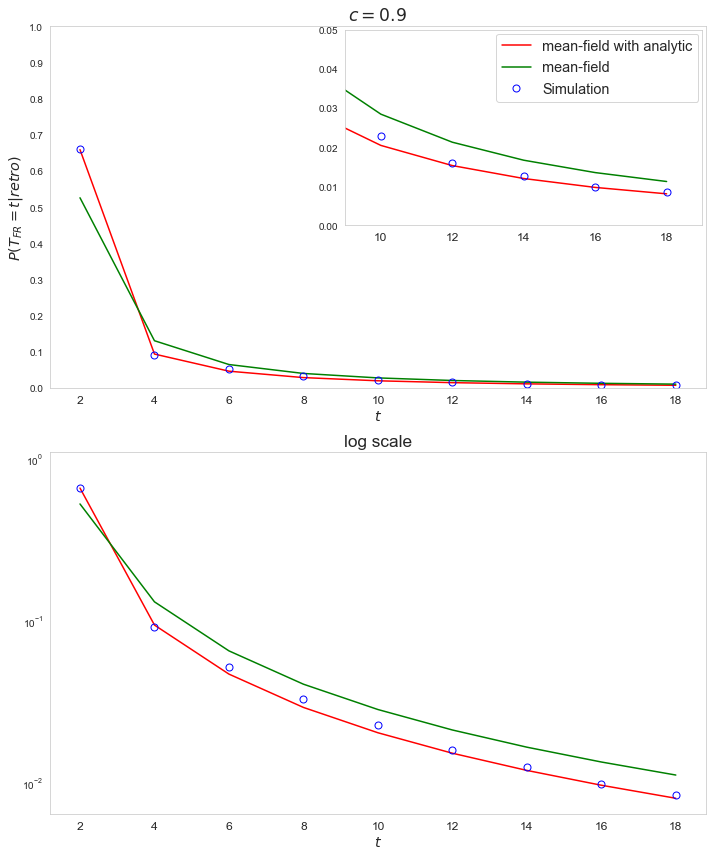

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


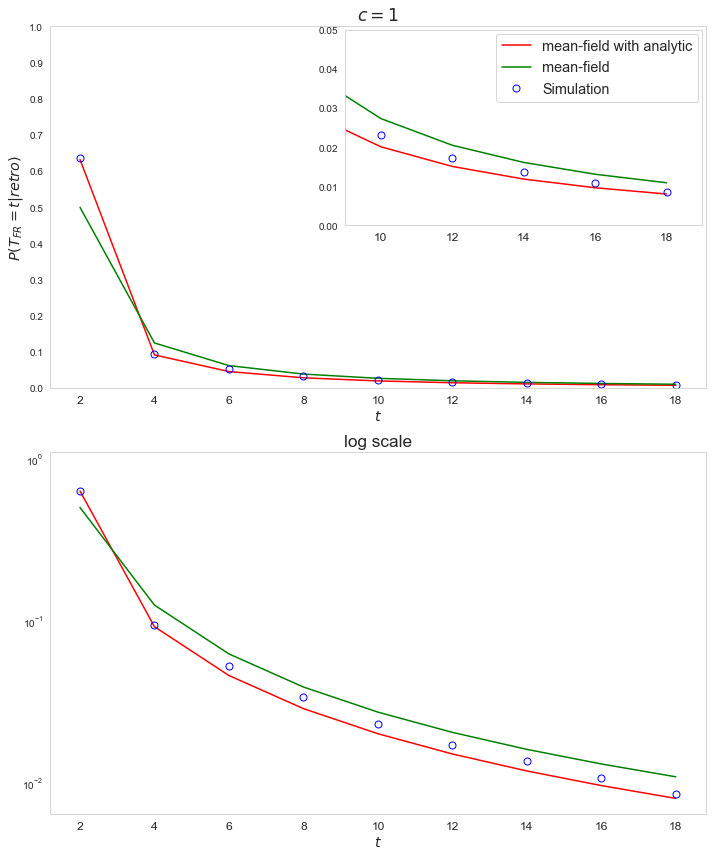

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


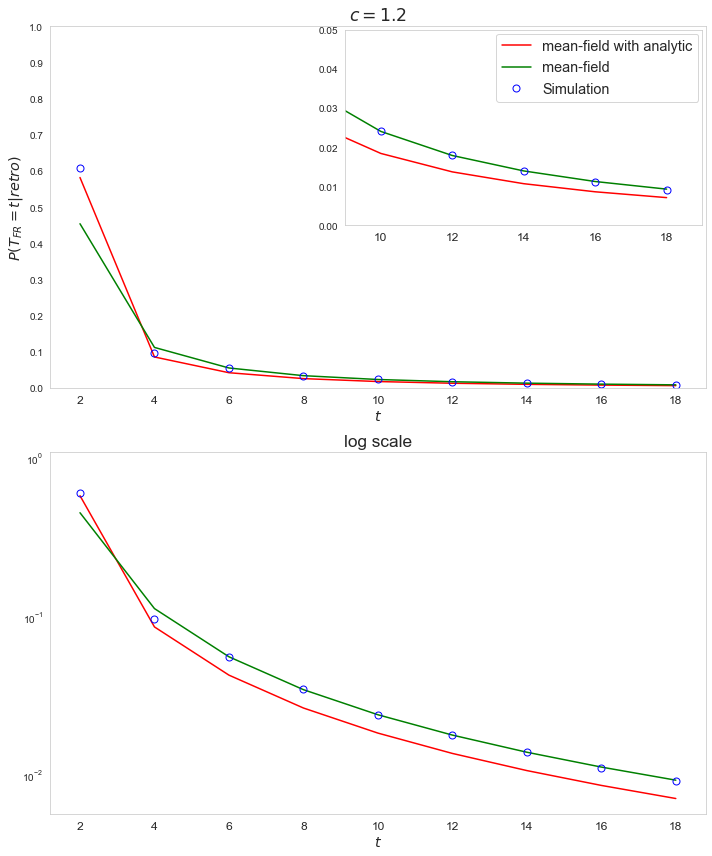

C:\Users\motty\AppData\Local\Temp\ipykernel_14584\3484360505.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


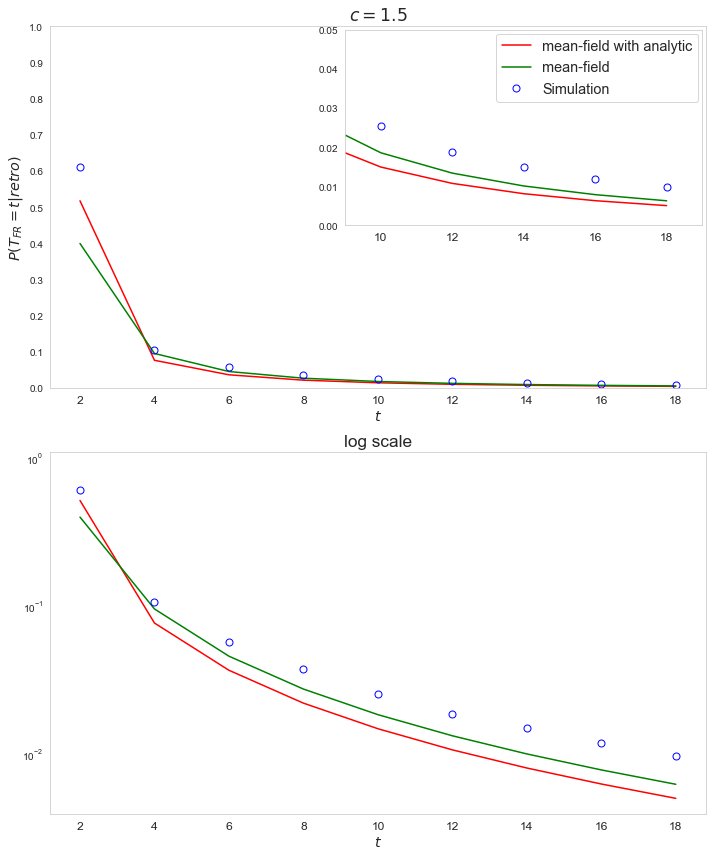

In [26]:
def simulation_data(df, c, max_length_to_return, filter_retroceding=True, return_odd=False):
    filtered_df = df[(df['c'] == c)]
    if filter_retroceding:
        filtered_df = filtered_df[filtered_df['is_retroceding']]
    size = filtered_df.shape[0]
    filtered_df = filtered_df[filtered_df['walk_length'] < max_length_to_return]
    filtered_df = filtered_df.groupby('walk_length').count().reset_index()
    filtered_df['p'] = filtered_df['c'] / size
    if not return_odd:
        filtered_df = filtered_df[filtered_df['walk_length'] % 2 == 0]
    return filtered_df['walk_length'], filtered_df['p']

for c in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.5]:

    plt.figure(figsize=(10, 12))
    plt.subplot(211)
    # c = 0.1
    x, y = simulation_data(df, c, max_length_to_return=20, filter_retroceding=True)


    theory_x = sorted(x.unique())
    theory_y = [mean_field(c, t) for t in theory_x]
    theory_y_reg = [mean_field_reg(c, t) for t in theory_x]

    plt.plot(theory_x, theory_y, **theory_params)
    plt.plot(theory_x, theory_y_reg, **theory_params_reg)
    plt.plot(x, y, **simulation_params)

    # Set plot labels and title
    plt.xlabel('$t$')
    plt.ylabel('$P(T_{FR} = t|retro)$')
    plt.ylim(0,1)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.title(f'$c = {c}$')

    inset = plt.gca().inset_axes([0.45, 0.45, 0.545, 0.54])
    inset.plot(theory_x, theory_y, **theory_params)
    inset.plot(theory_x, theory_y_reg, **theory_params_reg)
    inset.plot(x, y, **simulation_params)
    inset.set_xlim(9, 19)
    inset.set_ylim(0, 0.05)
    plt.legend()

    plt.subplot(212)

    plt.plot(theory_x, theory_y, **theory_params)
    plt.plot(theory_x, theory_y_reg, **theory_params_reg)
    plt.plot(x, y, **simulation_params)

    plt.xlabel('$t$')
    # plt.ylabel('$P(T_{FR} = t|retro)$ (log)')
    plt.yscale('log')
    plt.ylim(0, 1.1)
    plt.title('log scale')

    plt.tight_layout()
    plt.show()
    # plt.savefig(f'./figures/mean_field_{c}.png')

(0.0, 1.5)

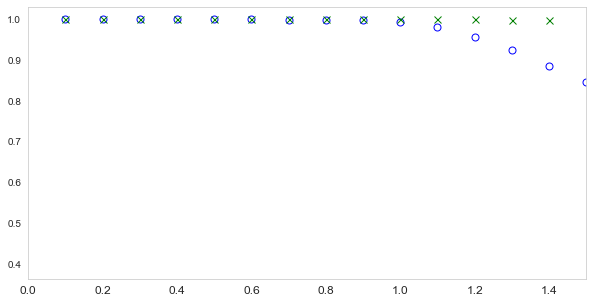

In [23]:
# Calculate the probability of the walk being retroceding based on the value of c
prob_retroceding = df.groupby('c')['is_retroceding'].mean()
prob_retroceding_linearized = df_linearized.groupby('c')['is_retroceding'].mean()

# Create a bar plot to visualize the probabilities
plt.plot(prob_retroceding.index, prob_retroceding.values, label='Simulation', **simulation_params)
plt.plot(prob_retroceding_linearized.index, prob_retroceding_linearized.values, label='Simulation (linearized)', **simulation_params_linearized)
plt.xlim(0,1.5)

(0.0, 1.5)

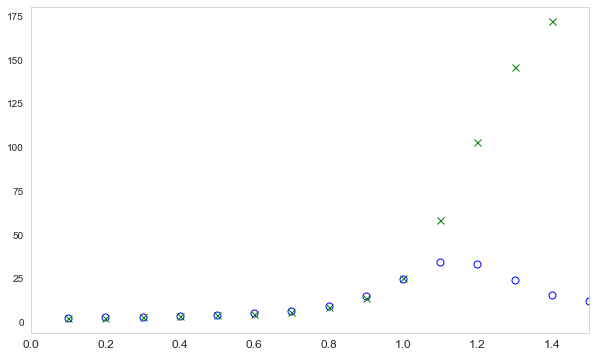

In [22]:
mean_retroceding = df[df['is_retroceding']].groupby('c')['walk_length'].mean()
mean_retroceding_linearized = df_linearized[df_linearized['is_retroceding']].groupby('c')['walk_length'].mean()

# Create the scatterplot
plt.figure(figsize=(10, 6))

# plt.plot(mean_all.index, mean_all.values, 'bo', label='All Walks')
plt.plot(mean_retroceding.index, mean_retroceding.values, label='Simulation', **simulation_params)
plt.plot(mean_retroceding_linearized.index, mean_retroceding_linearized.values, label='Simulation (linearized)', **simulation_params_linearized)
plt.xlim(0,1.5)

C:\Users\motty\AppData\Local\Temp\ipykernel_3820\2015854294.py:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.1)


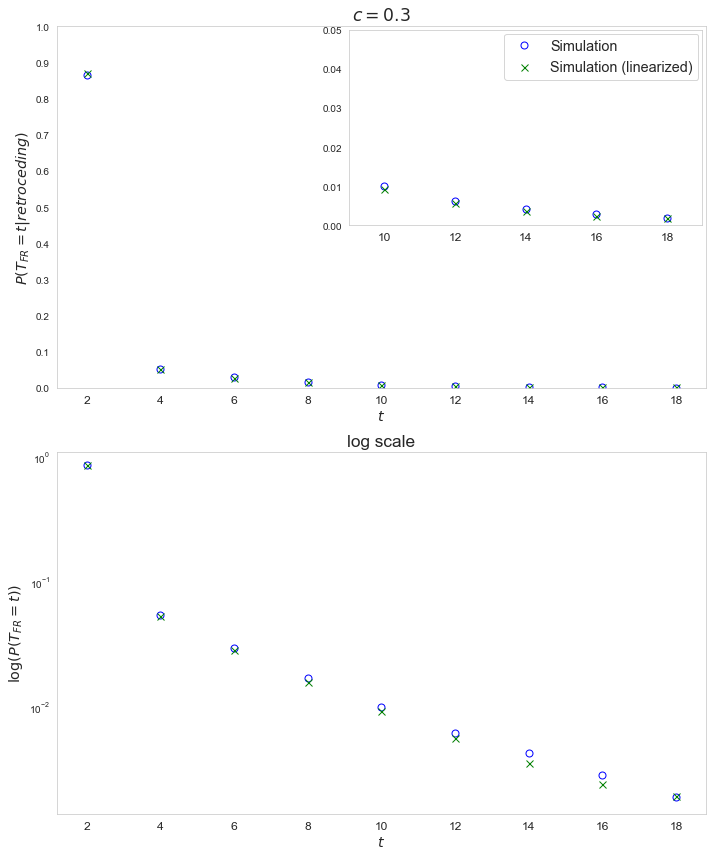

In [43]:
for c in [0.3]:

    plt.figure(figsize=(10, 12))
    plt.subplot(211)
    # c = 0.1
    x, y = simulation_data(df, c, max_length_to_return=20, filter_retroceding=True)
    plt.plot(x, y, label='Simulation', **simulation_params)

    x_linearized, y_linearized = simulation_data(df_linearized, c, max_length_to_return=20, filter_retroceding=True)
    plt.plot(x_linearized, y_linearized, label='Simulation (linearized)', **simulation_params_linearized)

    x_theory = range(2,20,2)
    y_theory = [p_t(c, s) for s in x_theory]

    # Set plot labels and title
    plt.xlabel('$t$')
    plt.ylabel('$P(T_{FR} = t|retroceding)$')
    plt.ylim(0,1)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.title(f'$c = {c}$')

    inset = plt.gca().inset_axes([0.45, 0.45, 0.545, 0.54])
    inset.plot(x, y, label='Simulation', **simulation_params)
    inset.plot(x_linearized, y_linearized, label='Simulation (linearized)', **simulation_params_linearized)
    inset.set_xlim(9, 19)
    inset.set_ylim(0, 0.05)
    plt.legend()

    plt.subplot(212)
    plt.plot(x, y, label='Simulation', **simulation_params)
    plt.plot(x_linearized, y_linearized, label='Simulation (linearized)', **simulation_params_linearized)

    plt.xlabel('$t$')
    plt.ylabel('$\log(P(T_{FR} = t))$')
    plt.yscale('log')
    plt.ylim(0, 1.1)
    plt.title('log scale')

    plt.tight_layout()
    plt.show()

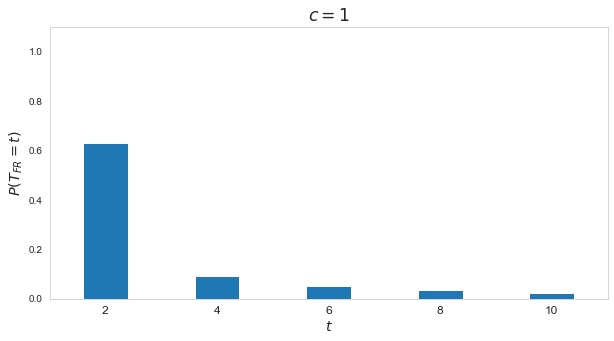

In [43]:
n = 1000
data = []
for c in [1]:
    # c = 1
    steps = 20
    probs = []
    # for i in tqdm(range(100)):
    #     g = ig.Graph.Erdos_Renyi(n, p=c / n)
    #     connected_nodes = random.sample([node for node, degree in enumerate(g.degree()) if degree > 0], 1)
    #     probs += [mkv.get_probabilities(g, node, steps) for node in connected_nodes]
    # x_mkv = range(2, steps)
    # y_mkv = [mean(list(z)) for z in zip(*probs)]
    # for i in range(len(x_mkv)):
    #     data.append({'c': c, 'walk_length': x_mkv[i], 'p': y_mkv[i], 'type': 'matrices'})
    x, y = simulation_data(df, c, max_length_to_return=20, filter_retroceding=False)
    for i in range(len(x)):
        data.append({'c': c, 'walk_length': x[i], 'p': y[i], 'type': 'actual walk'})
    # plt.plot(x_mkv,y_mkv, 'xr', label='Matrices')
    plt.bar(x,y,  label='Actual Walk')
    plt.ylim(0,1.1)

    plt.xlabel('$t$')
    plt.xticks(np.arange(2, 21, 2))
    plt.xlim(1,11)
    plt.ylabel('$P(T_{FR} = t)$')
    plt.title(f'$c = {c}$')
    # plt.legend()
    # plt.yscale('log')
    plt.show()
    # plt.savefig(f'./figures/mkv_{c}.png')

In [77]:
dfff = pd.DataFrame(data)

In [79]:
dfff.to_csv('./data/dist.csv')

In [14]:
filtered_df = df[(df['c'] == 0.2) & df['is_retroceding']]
size = filtered_df.shape[0]
filtered_df = filtered_df.groupby('walk_length').count().reset_index()
filtered_df['p'] = filtered_df['c'] / size
filtered_df

,walk_length,distinct_sites,is_retroceding,start_node_degree,component_size,c,p
0,2,181372,181372,181372,181372,181372,2.748061e-02
1,4,8071,8071,8071,8071,8071,1.222879e-03
2,6,4392,4392,4392,4392,4392,6.654545e-04
3,8,2295,2295,2295,2295,2295,3.477273e-04
4,10,1390,1390,1390,1390,1390,2.106061e-04
5,12,777,777,777,777,777,1.177273e-04
6,14,471,471,471,471,471,7.136364e-05
7,16,331,331,331,331,331,5.015152e-05
8,18,213,213,213,213,213,3.227273e-05
9,20,151,151,151,151,151,2.287879e-05


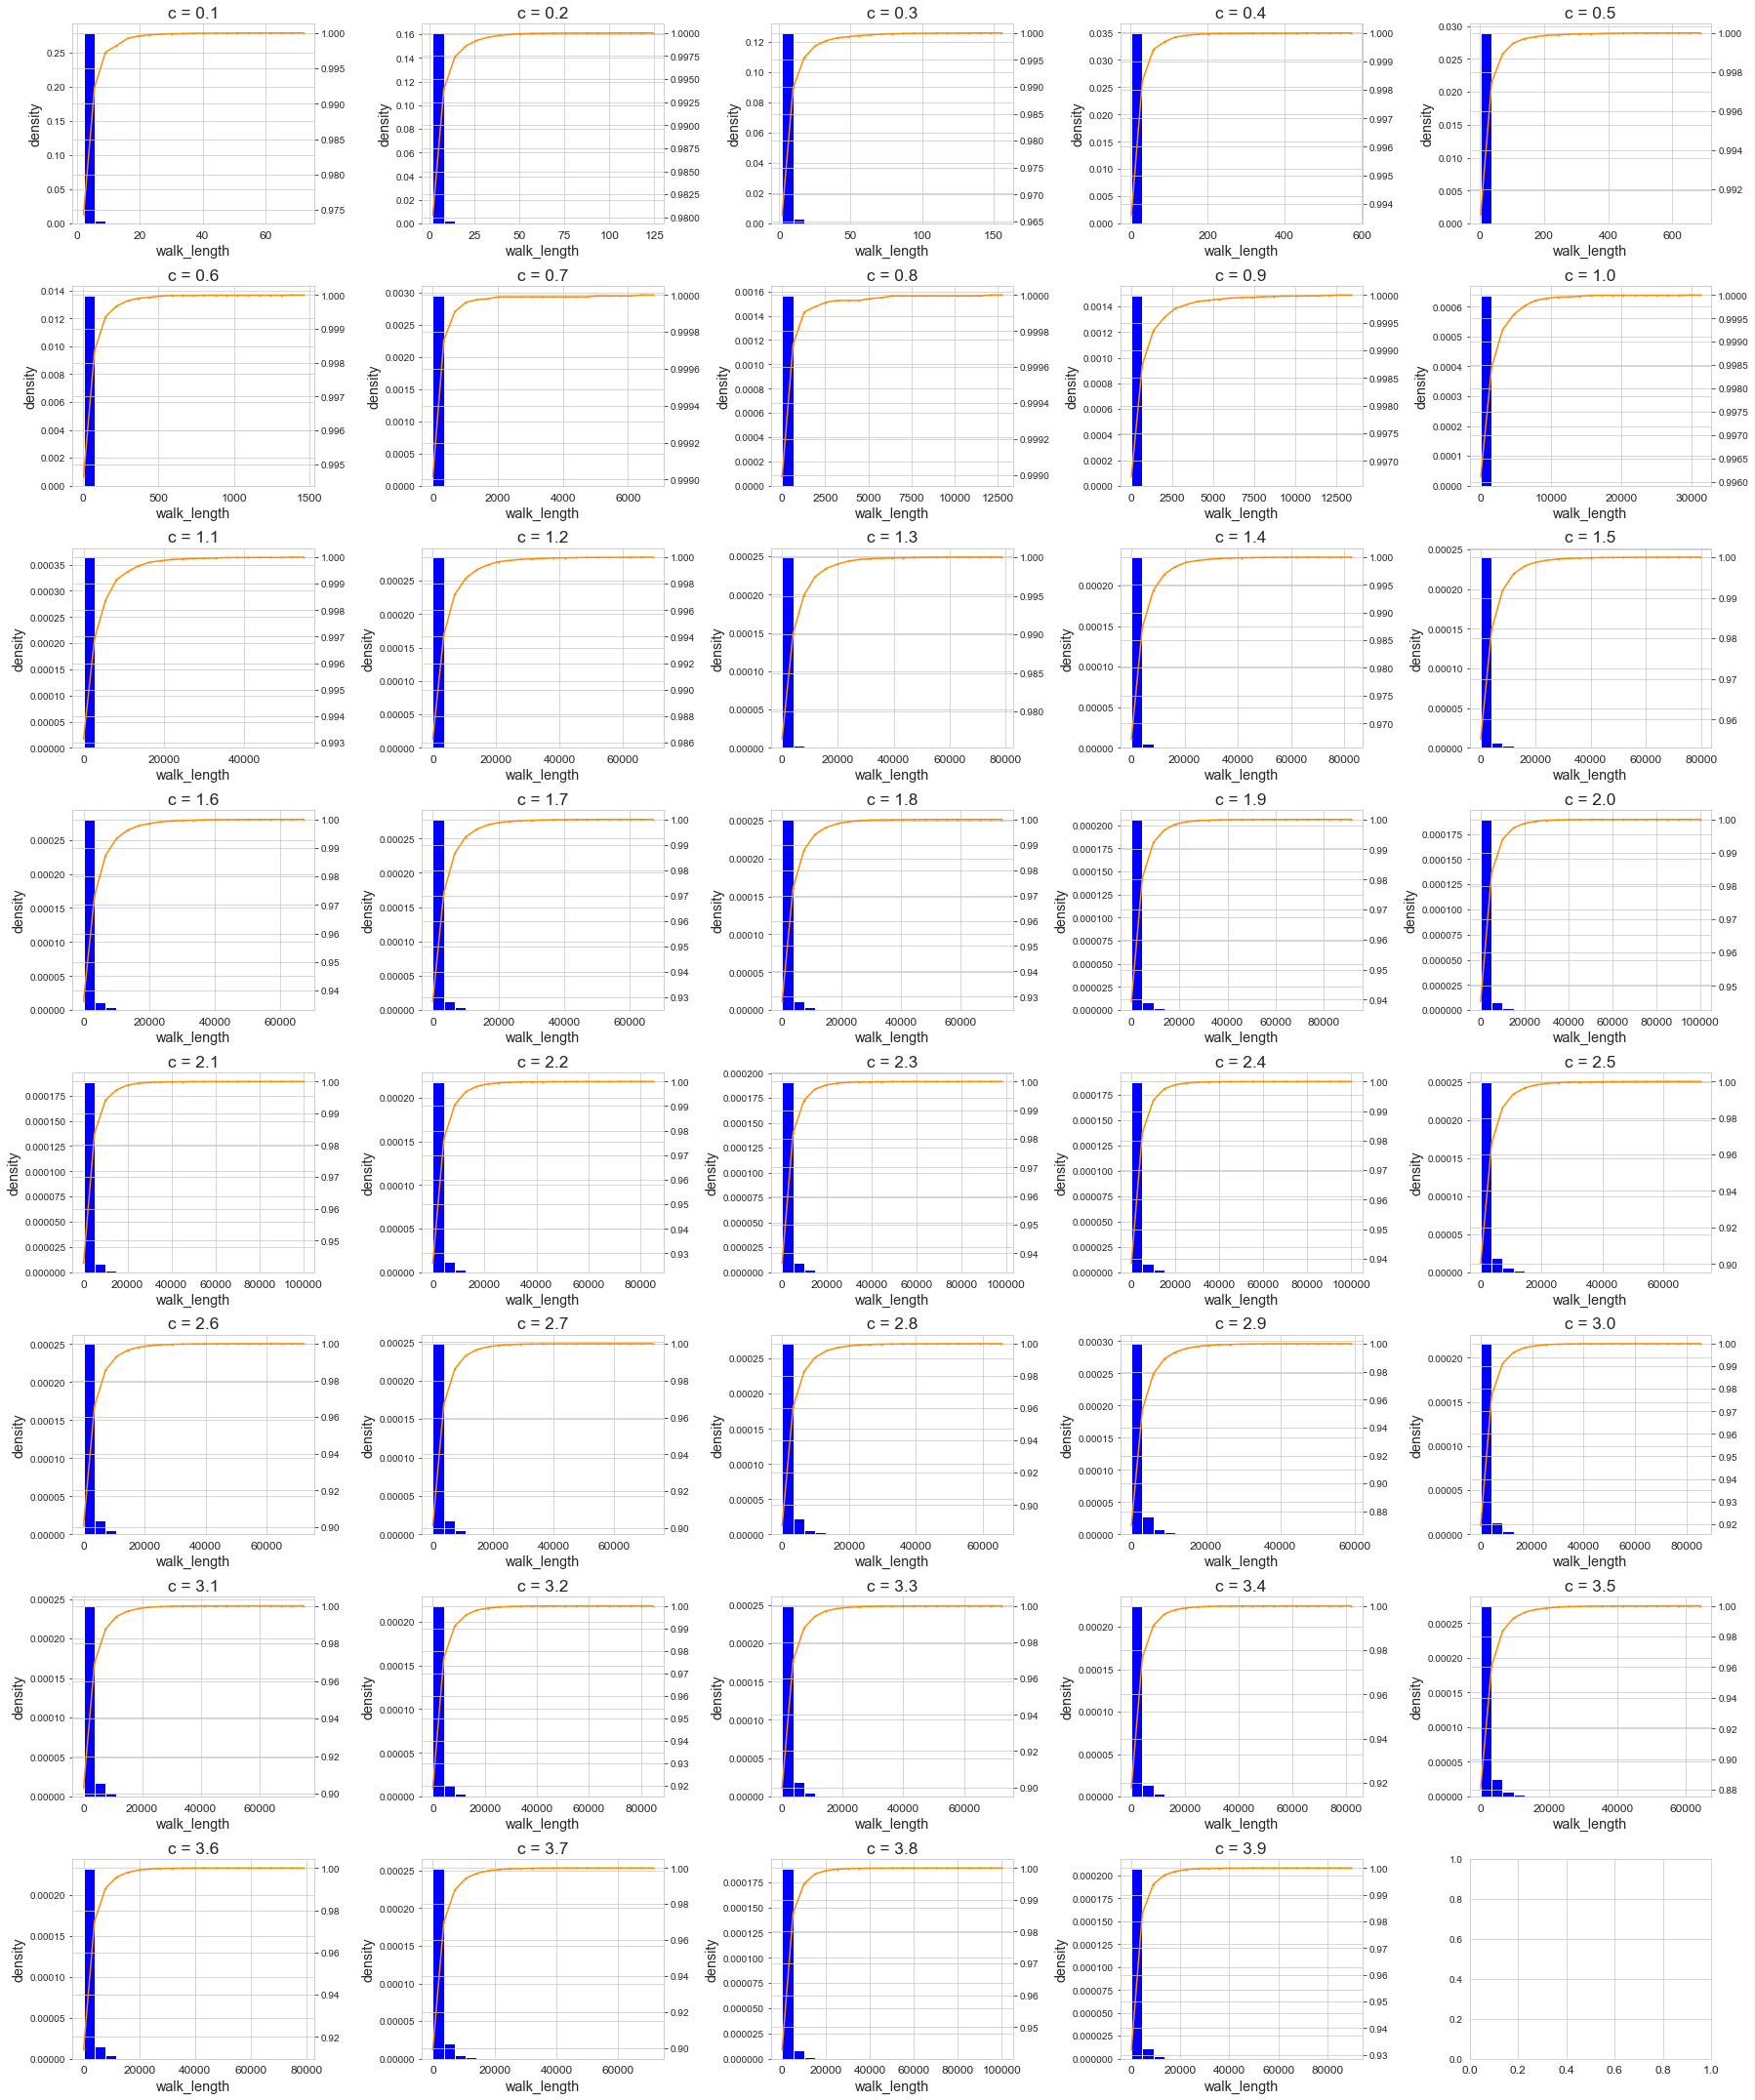

In [161]:
# Reshape the c values into a 5x4 grid
c_values = df['c'].unique()
num_cols = 5
num_rows = len(c_values) // num_cols + int(len(c_values) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 30))

for i, c in enumerate(c_values):
    ax = axes[i // num_cols, i % num_cols]

    # Filter the DataFrame for the current c value
    filtered_df = df[df['c'] == c]

    # Plot the distribution of walk_length for the current c value
    ax.set_title(f'c = {c}')
    ax.set_xlabel('walk_length')
    ax.set_ylabel('density')

    values, base, _ = ax.hist((filtered_df['walk_length']), bins=20, density=True, color="blue")
    values = np.append(values, 0)
    ax_bis = ax.twinx()
    ax_bis.plot(base, np.cumsum(values) / np.cumsum(values)[-1], color='darkorange', marker='o', linestyle='-',
                markersize=1)

plt.tight_layout()
plt.show()

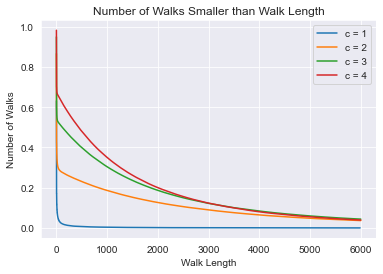

In [45]:
# Group the DataFrame by 'c'
grouped_df = df.groupby('c')

# Iterate over each group
for c_value, group in grouped_df:
   # if c_value not in [3,4,10]:
   #     continue
    # Calculate the number of walks smaller than walk length for each value of 'walk_length'
    walks_smaller_than_length = group['walk_length'].value_counts().sort_index().cumsum()
    walks_smaller_than_length = 1 - walks_smaller_than_length / max(walks_smaller_than_length)
    walks_smaller_than_length = walks_smaller_than_length[walks_smaller_than_length.index < 6000]

    # Plot the data
    plt.plot(walks_smaller_than_length.index, walks_smaller_than_length.values, label=f'c = {c_value}')

#walks_smaller_than_length
# Set the plot title and labels
plt.title('Number of Walks Smaller than Walk Length')
plt.xlabel('Walk Length')
plt.ylabel('Number of Walks')

#Show the legend
plt.legend()

# Display the plot
plt.show()

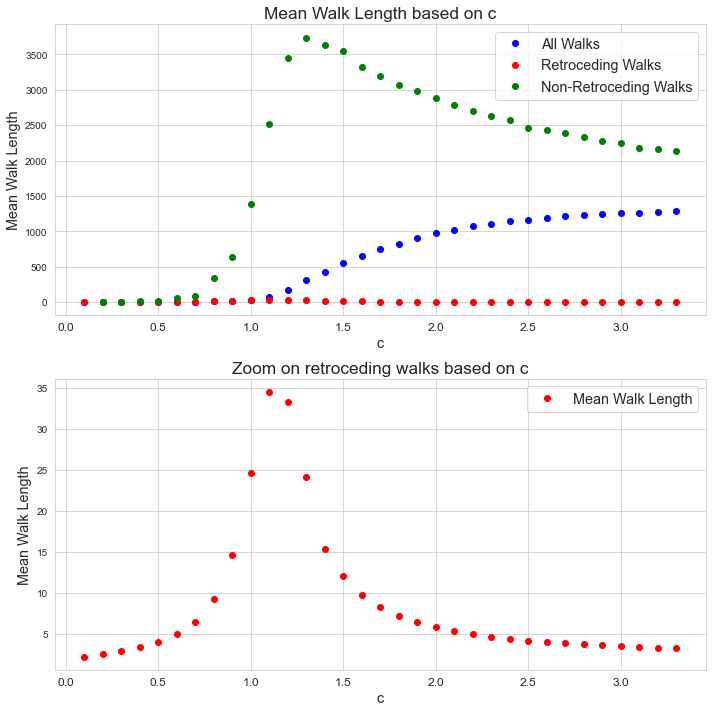

In [6]:
# Calculate the mean for all walks
mean_all = df.groupby('c')['walk_length'].mean()

# Calculate the mean for retroceding walks
mean_by_retroceding = df.groupby(['c', 'is_retroceding'])['walk_length'].mean().reset_index()
# Calculate the mean for non-retroceding walks
mean_retroceding = mean_by_retroceding[mean_by_retroceding['is_retroceding']]
mean_non_retroceding = mean_by_retroceding[~mean_by_retroceding['is_retroceding']]
# mean_non_retroceding = df[~df['is_retroceding']]['walk_length'].groupby(df['c']).mean()

# Create the scatterplot
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(mean_all.index, mean_all.values, 'bo', label='All Walks')
plt.plot(mean_retroceding['c'], mean_retroceding['walk_length'], 'ro', label='Retroceding Walks')
plt.plot(mean_non_retroceding['c'], mean_non_retroceding['walk_length'], 'go', label='Non-Retroceding Walks')
# Set plot labels and title
plt.xlabel('c')
plt.ylabel('Mean Walk Length')
plt.title('Mean Walk Length based on c')
plt.legend()

plt.subplot(212)
plt.plot(mean_retroceding['c'], mean_retroceding['walk_length'], 'ro', label='Mean Walk Length')
# plt.plot(mean_retroceding.index, mean_distinct_sites.values, 'cd', label='Mean Distinct Sites')
# Set plot labels and title
plt.xlabel('c')
plt.ylabel('Mean Walk Length')
plt.title('Zoom on retroceding walks based on c')
plt.legend()

# Show the legend
plt.tight_layout()
plt.show()

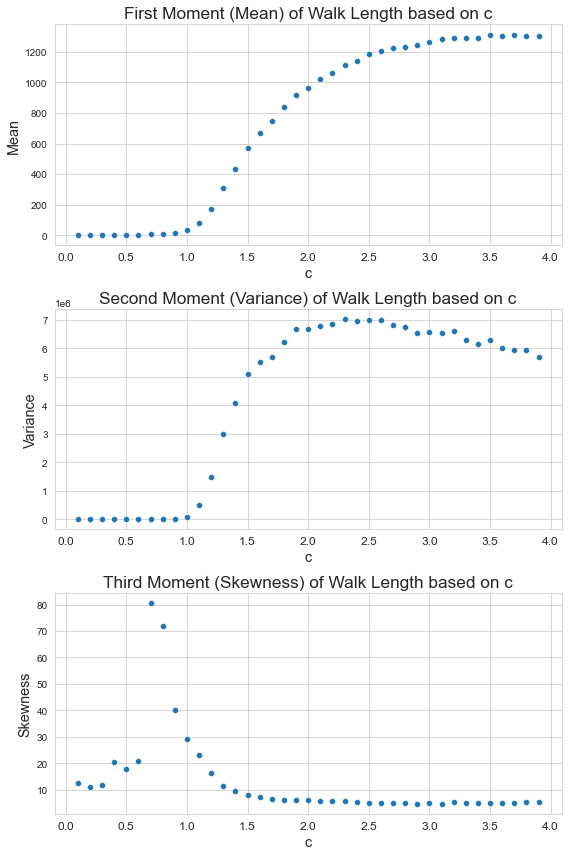

In [173]:
# Calculate the first, second, and third moments of walk_length based on the value of c
moments = df.groupby('c')['walk_length'].agg(['mean', 'var', 'skew'])

# Create subplots for each moment
fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

# Plot first moment (mean)
sns.scatterplot(x=moments.index, y=moments['mean'], ax=axes[0])
axes[0].set_xlabel('c')
axes[0].set_ylabel('Mean')
axes[0].set_title('First Moment (Mean) of Walk Length based on c')

# Plot second moment (variance)
sns.scatterplot(x=moments.index, y=moments['var'], ax=axes[1])
axes[1].set_xlabel('c')
axes[1].set_ylabel('Variance')
axes[1].set_title('Second Moment (Variance) of Walk Length based on c')

# Plot third moment (skewness)
sns.scatterplot(x=moments.index, y=moments['skew'], ax=axes[2])
axes[2].set_xlabel('c')
axes[2].set_ylabel('Skewness')
axes[2].set_title('Third Moment (Skewness) of Walk Length based on c')

plt.tight_layout()
plt.show()

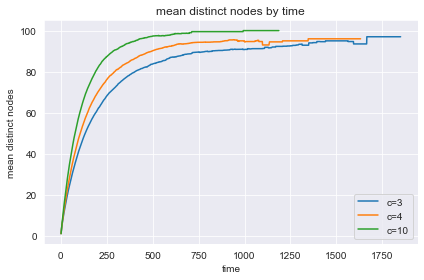

In [18]:
# Reshape the c values into a 5x4 grid
c_values = df['c'].unique()
num_rows = 5
num_cols = 4


for i, c in enumerate(c_values):
    if c not in [3,4,10]:
        continue
    # Filter the DataFrame for the current c value
    filtered_df = df2[df2['c'] == c]
    plt.plot(filtered_df['time'], filtered_df['mean_distinct_nodes'], label=f'c={c}')

plt.title(f'mean distinct nodes by time')
plt.xlabel('time')
plt.ylabel('mean distinct nodes')
plt.legend()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


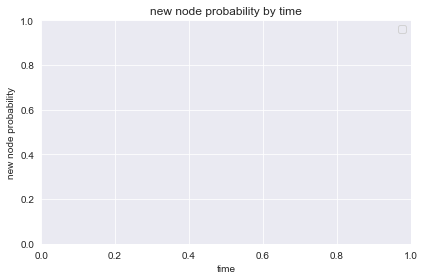

In [28]:
# Reshape the c values into a 5x4 grid
c_values = df['c'].unique()
num_rows = 5
num_cols = 4


for i, c in enumerate(c_values):
    if c not in [3,4,10]:
        continue
    # Filter the DataFrame for the current c value
    filtered_df = df2[df2['c'] == c]
    plt.plot(filtered_df['time'], filtered_df['new_node_probability'], label=f'c={c}')

plt.title(f'new node probability by time')
plt.xlabel('time')
plt.ylabel('new node probability')
plt.legend()
plt.tight_layout()
plt.show()

In [102]:
df

,walk_length,distinct_sites,is_retroceding,start_node_degree,component_size,c
0,2,2,True,1,2,0.10
1,2,2,True,1,2,0.10
2,2,2,True,1,2,0.10
3,2,2,True,1,2,0.10
4,2,2,True,2,3,0.10
...,...,...,...,...,...,...
15,2,2,True,2,7,1.15
16,2,2,True,1,5,1.15
17,2,2,True,2,317,1.15
18,2,2,True,1,2,1.15


In [9]:
df3 = df[df['c'] == 3]
df3

,Unnamed: 0,walk_length,in_giant_component,started_in_2core,distinct_sites,is_retroceding,c,g_id
1000000,1000000,2,False,False,2,True,3,0
1000001,1000001,636,True,True,296,False,3,0
1000002,1000002,2,True,True,2,True,3,0
1000003,1000003,1068,True,True,413,False,3,0
1000004,1000004,250,True,True,132,False,3,0
...,...,...,...,...,...,...,...,...
1499995,1499995,2,False,False,2,True,3,49
1499996,1499996,2,True,True,2,True,3,49
1499997,1499997,1851,True,True,552,False,3,49
1499998,1499998,10,True,True,5,True,3,49


In [23]:
import utils
s = 20
x,y=utils.full_histogram(df3['walk_length'])
list(y)[:s]

[0.050656,
 0.299972,
 0.000362,
 0.053742,
 0.00033,
 0.023846,
 0.000342,
 0.012876,
 0.00028,
 0.007644,
 0.000304,
 0.00492,
 0.000316,
 0.003394,
 0.000322,
 0.002598,
 0.000314,
 0.001844,
 0.00031,
 0.001598]